# Image Processing Assignment 1

Bereket Kebede, Grad student <br>
University of Memphis, Spring 2022 <br>
Instructor: Dr. Yeasin

## Setup



Before we commence the assignement, let's do some setup 


In [2]:
##################################################
# Import necessary libraries

import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import warnings


In [3]:
##################################################
# Make Notenook figues centered, for better visuals


from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>""")

In [4]:
##################################################
# Function to load all images from a given folder


def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append(img)
    return images

## Question #1



### Double Exposure


Instruction: capture a burst of images using your cell phone or camera. Add 20-25 images of same object taken under same conditions. I want you to compute the signal to noise ratio and noise variance to explain the crisp image created.

**Algorithm:**


```math
Crisp Image = Image_1 + Image_2 + ... + Image_n / n  , where n is the number of burst images
```

**Conclusion:**

A crisp image is acheived by averaging a burst capture of a same object. Quantiatively the SNR of a crisp image is grater that SNR of individual burst of images.

*References* <br><br>
[1] How to take burst images on motorola phone, https://www.youtube.com/watch?v=WiOjp-dftho&ab_channel=HardReset.Info

Text(0.5, 0.98, 'Crisp Image')

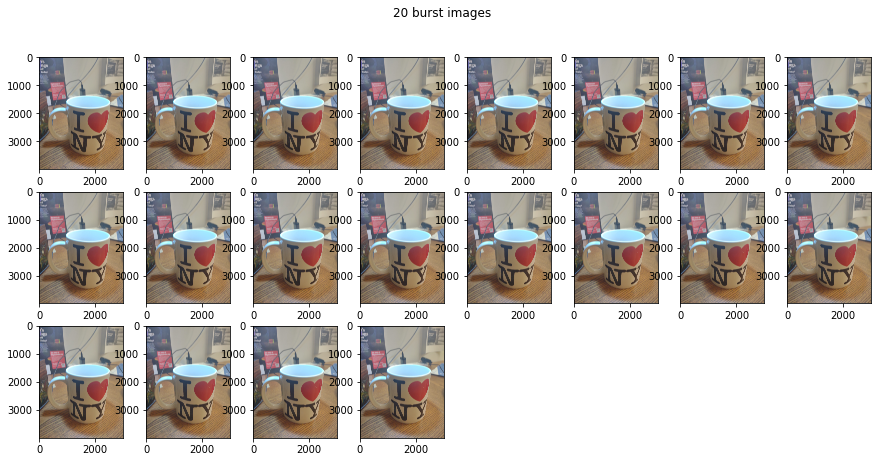

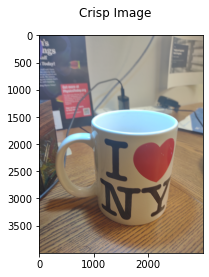

In [5]:
##################################################
# Double exposure

# Burst of Images directory
BOI = load_images_from_folder("Data/BOI_2")

f = plt.figure(figsize=(15, 7))
plt.suptitle(str(len(BOI))+' burst images')
count = 0
crisp_image = np.zeros(BOI[0].shape)

for i in BOI:
    count += 1 
    f.add_subplot(3, 8, count)
    plt.imshow(i)
    crisp_image += BOI[count-1]

# Normalize crisp image
crisp_image = np.multiply(1/(count*255), crisp_image)
f_2 = plt.figure()
plt.imshow(crisp_image)
plt.suptitle('Crisp Image')

In [16]:
def SNR(image):
    mean = np.mean(image)
    variance = np.var(image)
    metrics = mean/variance
    return metrics

In [8]:
print("SNR of the crisp image is:", round(SNR(np.multiply(crisp_image, 255)), 4) )


SNR of the crisp image is: 0.065


In [14]:
for i in range(len(BOI)):
    print("SNR of burst Image_%d" %(i+1), round(SNR(BOI[i]),4) )

SNR of burst Image_1 0.0623
SNR of burst Image_2 0.0623
SNR of burst Image_3 0.0624
SNR of burst Image_4 0.0625
SNR of burst Image_5 0.0625
SNR of burst Image_6 0.0626
SNR of burst Image_7 0.0628
SNR of burst Image_8 0.0625
SNR of burst Image_9 0.0626
SNR of burst Image_10 0.0627
SNR of burst Image_11 0.0626
SNR of burst Image_12 0.0627
SNR of burst Image_13 0.0626
SNR of burst Image_14 0.0627
SNR of burst Image_15 0.0626
SNR of burst Image_16 0.0624
SNR of burst Image_17 0.0627
SNR of burst Image_18 0.0627
SNR of burst Image_19 0.0627
SNR of burst Image_20 0.0627


### Change Detection

Instruction: subtract frames taken from your favorite video or sequence of images.

**Algorithm:**


```math
Difference = Image_1 - Image_2
```

**Conclusion:**

Subtracting background image could be used to detect objects

In [15]:
def subtract_images(img1, img2):
    sub_img = np.absolute(img1 - img2)
    return sub_img

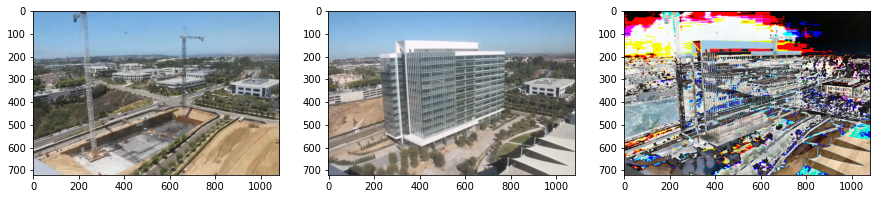

In [118]:
img1 = cv2.imread("Data/Subtract/Frame_1.png")
img2 = cv2.imread("Data/Subtract/Frame_2.png")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

f = plt.figure(figsize=(15, 7))


s = subtract_images(img1, img2)

f.add_subplot(1, 3, 1)
plt.imshow(img1)
f.add_subplot(1, 3, 2)
plt.imshow(img2)
f.add_subplot(1, 3, 3)
plt.imshow(s)

### Multiplication of Image

Instruction: Use 5+ images of your favorite object, mask different portion of different images and combine them to synthesize a new image. Align images properly before these simple operations to work.


**Algorithm:**

Mask images by zeroing parts of an image

**Conclusion:**

A new image can be synthesized from masked images

In [161]:
def mask_image(img,flag):
    new_img = img
    for k in range(img.shape[2]):
        for j in range( img.shape[1] ):
            for i in range((img.shape[0]*flag)//6 , img.shape[0]):
                new_img[i,j,k] = 0
                
    for k in range(img.shape[2]):
        for j in range(img.shape[1]):
            for i in range(0 , (img.shape[0]*(flag-1)//6)):
                new_img[i,j,k] = 0
    return new_img

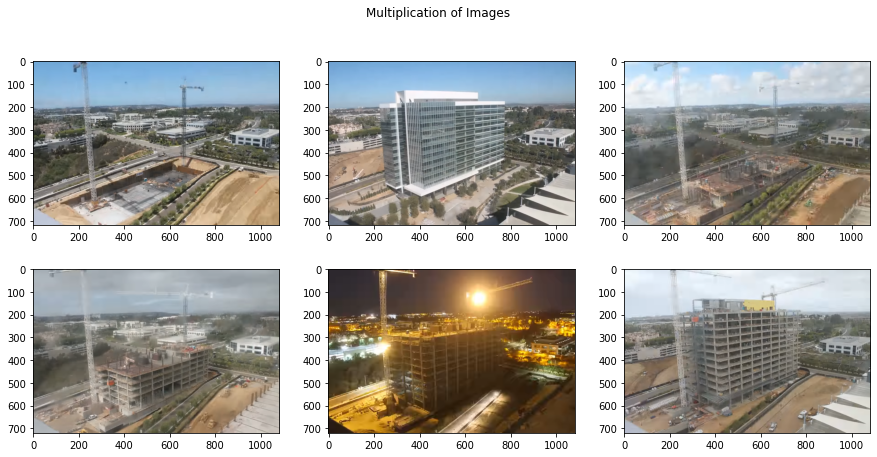

In [187]:
# Masked Images directory
MASKED = load_images_from_folder("Data/MASKED")
f = plt.figure(figsize=(15, 7))
plt.suptitle('Multiplication of Images')

count = 0
combined = MASKED[0]

for i in MASKED:
    count += 1 
    f.add_subplot(2, 3, count)
    plt.imshow(i)


In [173]:
# don't have to run, if you already have the masked images

MASKED = load_images_from_folder("Data/MASKED")

#img = MASKED[0]
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#p = mask_image(img, 1)
#p = mask_image(img, 1)

for i in range(len(MASKED)):
    img = MASKED[i]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    p = mask_image(img,i+1)
    cv2.imwrite("Data/MASKED_GEN/%d.jpg"%i, p)
    
#cv2.imwrite("Data/MASKED_GEN/2.jpg", p2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'New Image')

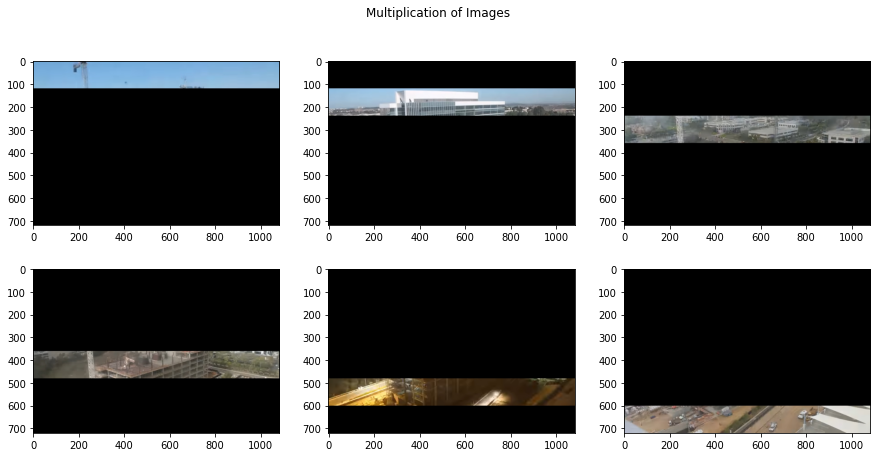

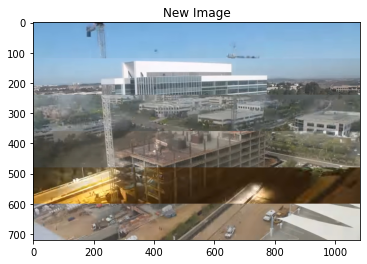

In [218]:

f = plt.figure(figsize=(15, 7))
plt.suptitle('Multiplication of Images')

MASKED_GEN = load_images_from_folder("Data/MASKED_GEN")

count = 0
combined = np.zeros(MASKED_GEN[0].shape, dtype = int)

for i in MASKED_GEN:
    combined += MASKED_GEN[count]
    count += 1 
    f.add_subplot(2, 3, count)
    plt.imshow(i)
   
f2 = plt.figure()
plt.imshow(combined)
plt.title("New Image")



## Question #2

### Image resolution


Instruction: Take your favorite image of size 1024 x 1024, reduce the size by a factor of 2 in both dimension and continue till 32 x32. Display the resized images in 1024 x 1024.


**Algorithm:**

Take input image and reduce the size by a factor of 2 until size of 32x32. 

**Conclusion:**

Resolution of an image is reduced while down-scaling an image

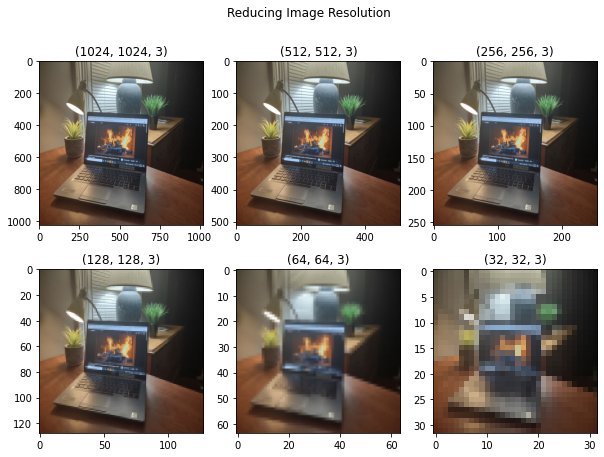

In [92]:
###################################################################
# Import Image

img = cv2.imread("Data/laptop.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


###################################################################
# Resize the image by half in iteration and display the results 

scale = 2
f = plt.figure(figsize=(10, 7))
temp = img
f.add_subplot(2, 3, 1)
plt.imshow(temp)
plt.title(temp.shape)
plt.suptitle('Reducing Image Resolution')

for i in range (5):
    f.add_subplot(2, 3, i+2)
    temp = cv2.resize(temp, (0,0), fx=1/scale, fy=1/scale) 
    plt.title(temp.shape)
    plt.imshow(temp)

### Qunatization

Instruction: Start with your favorite image. Use the “shift right” operator and force the MSB position to zero. This will reduce the dynamic range to half (for example, 0-255 to 0-127, 0-64,0-32, 0-16, 0-8, 0-4, and 0-2). Explain the effect of quantization and compute the SNR.

**Algorithm:**

Use “shift right” operator and force the MSB position of an image pixel intensity to zero to perform quantization.

**Conclusion:**

Qunatization could be performed by mapping the range of an image pixel intensity to a new range with scaled-down boundaires.
The SNR of the qunatized imaged is lower than SNR of the original image.


In [17]:
##

def shift_pixels(img, step):
    new_img = img
    for k in range(img.shape[2]):
        for j in range(img.shape[1]):
            for i in range(img.shape[0]):
                new_img[i,j,k] = img[i,j,k] >> 1
    return new_img

SNR of  128 is : 7.6609
SNR of  64 is : 7.5693
SNR of  32 is : 7.3779
SNR of  16 is : 6.9767
SNR of  8 is : 6.0717
SNR of  4 is : 4.6293
SNR of  2 is : 2.4728


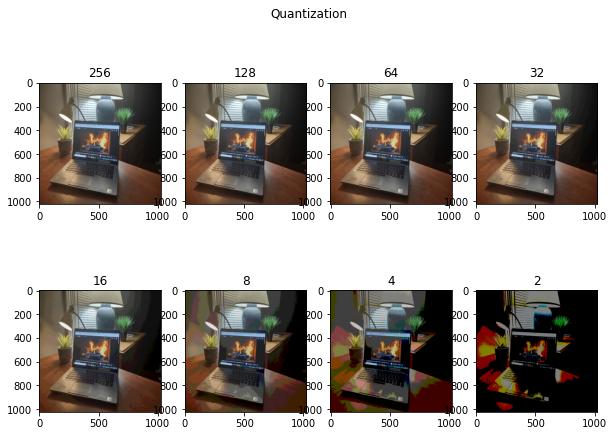

In [20]:

img = cv2.imread("Data/laptop.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

row, col = 2, 4

f = plt.figure(figsize=(10, 7))
f.add_subplot(row, col, 1)
plt.imshow(img)
plt.title('256')
plt.suptitle('Quantization')
temp = img

for i in range (row*col -1):
    f.add_subplot(row, col, i+2)
    temp = shift_pixels(temp, 1)
    c = temp/255 *(255/ ( 2**(7-i)) )
    plt.title(2**(7-i))
    plt.imshow(c)
    print("SNR of ", 2**(7-i), "is :", round(SNR(c),4))

### Multi-resolution


Instruction:  Multi-resolution: reduce the size the image progressively by a factor of 1.72 and display images.


**Algorithm:**

Reduce the size the image progressively by a factor of 1.72

**Conclusion:**

1.72 is the magic number to scale an image without losing too much resolution

SNR of  (595, 595, 3) is : 0.0305
SNR of  (346, 346, 3) is : 0.0309
SNR of  (201, 201, 3) is : 0.0316
SNR of  (117, 117, 3) is : 0.0324
SNR of  (68, 68, 3) is : 0.0336


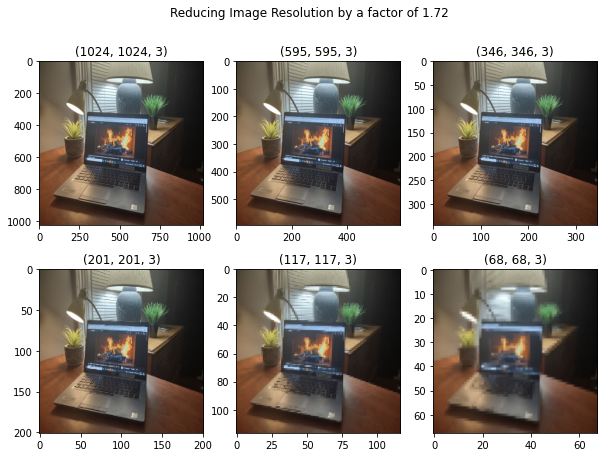

In [21]:
###################################################################
# Import Image

img = cv2.imread("Data/laptop.jpg")
cv2.imshow('image', img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


###################################################################
# Resize the image by half in iteration and display the results 

f = plt.figure(figsize=(10, 7))
temp = img
f.add_subplot(2, 3, 1)
plt.imshow(temp)
plt.title(temp.shape)
plt.suptitle('Reducing Image Resolution by a factor of 1.72')

for i in range (5):
    f.add_subplot(2, 3, i+2)
    temp = cv2.resize(temp, (0,0), fx=1/1.72, fy=1/1.72) 
    plt.title(temp.shape)
    plt.imshow(temp)
    print("SNR of ", temp.shape, "is :", round(SNR(temp),4))

# References


Multiplication:

[1] For loop with range: https://www.freecodecamp.org/news/python-for-loop-for-i-in-range-example/  <br>
[2] Save image cv2: https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/  <br>
[3] Youtube video source to generate masked images: https://www.youtube.com/watch?v=wfKA3OY7IWs&ab_channel=JorgeVel%C3%A1zquez  <br>

Quantization:

[1] Check if a digit is in array: https://www.kite.com/python/answers/how-to-check-if-an-element-exists-in-an-array-in-python <br>
[2] Shift bits right: https://stackoverflow.com/questions/64963170/how-to-do-arithmetic-right-shift-in-python-for-signed-and-unsigned-values